In [111]:
# Importing all the important libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [112]:
#Importing the train and test data
rfc_train = pd.read_csv("Train_data.csv")
rfc_test = pd.read_csv("Test_data.csv")

#Splitting the data into features and target
X_train = rfc_train.drop("Target", axis = 1)
y_train = rfc_train["Target"]

X_test = rfc_test.drop("Target", axis = 1)
y_test = rfc_test["Target"]

In [113]:
X_train.shape, y_train.shape


((3722, 12), (3722,))

In [114]:
X_test.shape, y_test.shape


((931, 12), (931,))

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

In [116]:
# Create a Random Forest Classifier model
rfc_model = RandomForestClassifier()

In [117]:
param_grid = {"criterion" : ["gini", "entropy"], "max_depth": [2,4,6,8,10,12]}

In [118]:
rfc_cv = GridSearchCV(rfc_model, param_grid= param_grid)

In [119]:
rfc_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [120]:
rfc_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [121]:
pd.DataFrame(rfc_cv.cv_results_)[["param_criterion","param_max_depth","params", "mean_test_score", "rank_test_score"]].sort_values(by ='rank_test_score')


,param_criterion,param_max_depth,params,mean_test_score,rank_test_score
9,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.851695,1
4,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.847937,2
3,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.847130,3
10,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.846594,4
5,gini,12,"{'criterion': 'gini', 'max_depth': 12}",0.844981,5
11,entropy,12,"{'criterion': 'entropy', 'max_depth': 12}",0.844978,6
2,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.843099,7
8,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.841219,8
1,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.810864,9
7,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.809521,10


In [122]:
#Testing the model
predictions = rfc_cv.predict(X_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       611
           1       0.88      0.70      0.78       320

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.84       931
weighted avg       0.87      0.86      0.86       931



In [124]:
confusion_matrix(y_test, predictions)


array([[580,  31],
       [ 96, 224]], dtype=int64)

In [126]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier instance
rfc_model = RandomForestClassifier()

# Fit the Random Forest model to the training data
rfc_model.fit(X_train, y_train)

# Featuring importances from the Random Forest model
feature_importances = rfc_model.feature_importances_

In [127]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

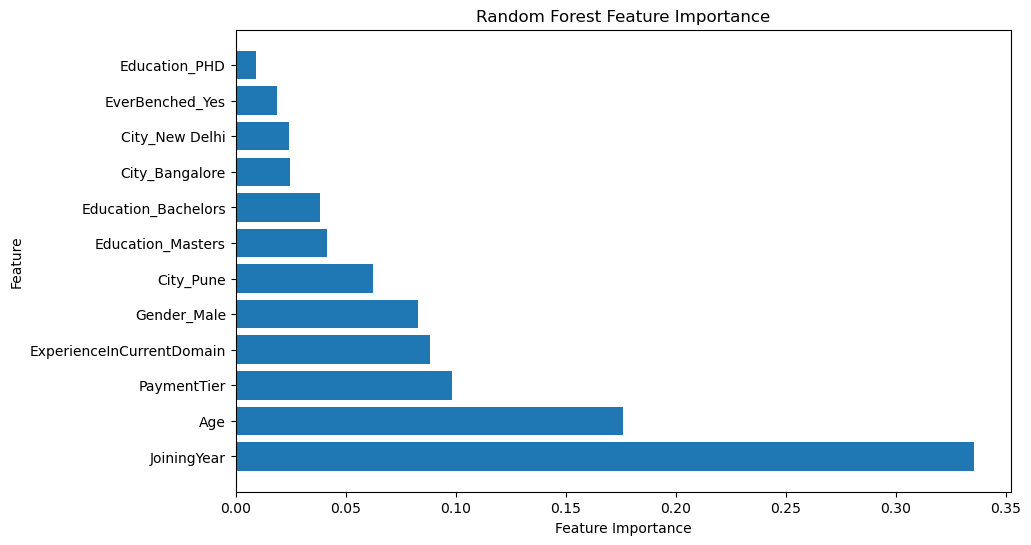

In [128]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [129]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, 12],
}


In [130]:
# Create an empty DataFrame to store the results
metrics_rf = pd.DataFrame(columns=X_train.columns.tolist() + ['Feature_Count', 'Train_Accuracy', 'Test_Accuracy'])

In [131]:
import numpy as np

In [132]:
for i in range(1, len(X_train.columns)):
    # Fit the Random Forest model to the selected features
    rfc_model.fit(X_train, y_train)
    
    # Get feature importances from the Random Forest
    feature_importances = rfc_model.feature_importances_
    
    # Sort features by importance and select the top i features
    sorted_indices = np.argsort(feature_importances)[::-1]
    selected_indices = sorted_indices[:i]
    
    # Create new training and testing sets with the selected features
    new_X_train = X_train.iloc[:, selected_indices]
    new_X_test = X_test.iloc[:, selected_indices]
    
    # Fit the Random Forest model with the selected features
    rfc_model.fit(new_X_train, y_train)
    
    # Make predictions on the test set
    predictions = rfc_model.predict(new_X_test)
    
    # Calculate and store the accuracy scores
    train_accuracy = rfc_model.score(new_X_train, y_train)
    test_accuracy = accuracy_score(y_test, predictions)
    
    # Create a dictionary to add rows into the metrics DataFrame
    my_dict = {}
    for j, item in enumerate(X_train.columns.tolist()):
        if j in selected_indices:
            my_dict[item] = 1
        else:
            my_dict[item] = 0
    my_dict['Test_Accuracy'] = test_accuracy
    my_dict['Train_Accuracy'] = train_accuracy
    my_dict['Feature_Count'] = i
    metrics_rf.loc[len(metrics_rf)] = my_dict



In [133]:
metrics_rf = metrics_rf.fillna(0)
metrics_rf.sort_values('Train_Accuracy', ascending=False)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes,Feature_Count,Train_Accuracy,Test_Accuracy
10,1,1,1,1,1,1,0,1,1,1,1,1,11,0.929608,0.836735
8,1,1,1,1,1,1,0,1,0,1,1,0,9,0.922085,0.827068
9,1,1,1,1,1,1,0,1,1,1,1,0,10,0.922085,0.828142
7,1,1,1,1,1,1,0,0,0,1,1,0,8,0.915637,0.838883
6,1,1,1,1,0,1,0,0,0,1,1,0,7,0.911607,0.835661
5,1,1,1,1,0,0,0,0,0,1,1,0,6,0.875336,0.798067
4,1,1,1,1,0,0,0,0,0,0,1,0,5,0.851155,0.776584
3,1,1,1,0,0,0,0,0,0,0,1,0,4,0.823751,0.795918
2,1,1,1,0,0,0,0,0,0,0,0,0,3,0.808974,0.807734
1,1,0,1,0,0,0,0,0,0,0,0,0,2,0.736701,0.719656


In [134]:
#Final model with 3 features

X_train_3feats = X_train[["City_Pune", "JoiningYear", "Gender_Male"]]
X_test_3feats = X_test[["City_Pune", "JoiningYear", "Gender_Male"]]

In [135]:
rfc_cv.fit(X_train_3feats, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [136]:
rfc_cv.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [137]:
predictions_3feats = rfc_cv.predict(X_test_3feats) 

In [138]:
print(classification_report(y_test, predictions_3feats))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       611
           1       0.89      0.54      0.67       320

    accuracy                           0.82       931
   macro avg       0.84      0.75      0.77       931
weighted avg       0.83      0.82      0.80       931



In [139]:
confusion_matrix(y_test, predictions_3feats)

array([[589,  22],
       [148, 172]], dtype=int64)

In [140]:
# Using GridSearchCV to tune the parameter

In [141]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, 12],
}


In [142]:
# Creating a Random Forest Classifier model:
rfc_model = RandomForestClassifier()


In [143]:
# Creating GridSearchCV with the Random Forest model and parameter grid:
rfc_cv = GridSearchCV(rfc_model, param_grid=rf_param_grid, scoring='accuracy', cv=3)
rfc_cv.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [144]:
# Print the best parameters:
print("Best Parameters for Random Forest:", rfc_cv.best_params_)

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}


In [146]:
# Evaluate the Random Forest model with the best parameters:
predictions = rfc_cv.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       611
           1       0.88      0.69      0.78       320

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.84       931
weighted avg       0.86      0.86      0.86       931



In [147]:
#Print the confusion matrix:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[581  30]
 [ 98 222]]


In [148]:
#Randomly removing some features and re-evaluate the models

In [149]:
# Define the parameter grid for Random Forest:
rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, 12],
}

# Fit the Random Forest model to the original training data:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
# Evaluate the model on the original test data:

predictions_original = rfc_model.predict(X_test)
original_accuracy = accuracy_score(y_test, predictions_original)
print("Original Accuracy:", original_accuracy)

Original Accuracy: 0.8281417830290011


In [151]:
# Randomly remove some features (for example, remove 20% of features)
random_seed = 42  # Set a random seed for reproducibility
np.random.seed(random_seed)

In [152]:
# Define the percentage of features to remove (e.g., 20%)
percentage_to_remove = 0.20

In [153]:
# Randomly select the features to remove:
num_features_to_remove = int(X_train.shape[1] * percentage_to_remove)
randomly_selected_features = np.random.choice(X_train.columns, num_features_to_remove, replace=False)

In [154]:
# Create new training and testing datasets with features removed:
X_train_removed = X_train.drop(randomly_selected_features, axis=1)
X_test_removed = X_test.drop(randomly_selected_features, axis=1)

In [155]:
# Fit the Random Forest model to the modified training data:
rfc_model.fit(X_train_removed, y_train)

RandomForestClassifier()

In [156]:
# Evaluate the model on the modified test data
predictions_removed = rfc_model.predict(X_test_removed)
removed_accuracy = accuracy_score(y_test, predictions_removed)
print("Accuracy after Feature Removal:", removed_accuracy)

Accuracy after Feature Removal: 0.8131041890440387


In [157]:
# Compare classification reports and confusion matrices for original and modified data
print("\nClassification Report (Original Data):")
print(classification_report(y_test, predictions_original))
print("\nConfusion Matrix (Original Data):")
print(confusion_matrix(y_test, predictions_original))


Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       611
           1       0.78      0.70      0.74       320

    accuracy                           0.83       931
   macro avg       0.81      0.80      0.80       931
weighted avg       0.83      0.83      0.83       931


Confusion Matrix (Original Data):
[[547  64]
 [ 96 224]]


In [158]:
print("\nClassification Report (Data with Feature Removal):")
print(classification_report(y_test, predictions_removed))
print("\nConfusion Matrix (Data with Feature Removal):")
print(confusion_matrix(y_test, predictions_removed))


Classification Report (Data with Feature Removal):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       611
           1       0.77      0.65      0.71       320

    accuracy                           0.81       931
   macro avg       0.80      0.77      0.78       931
weighted avg       0.81      0.81      0.81       931


Confusion Matrix (Data with Feature Removal):
[[549  62]
 [112 208]]


In [159]:
# Dropping Features

In [165]:
#based on feature importance , we are going to drop 3 least importance features

# Create and fit a Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rfc_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance (e.g., 0.1) to select important features
threshold = 0.1
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Create new datasets with only the important features
X_train_new = X_train[important_features]
X_test_new = X_test[important_features]


In [168]:
# Define the parameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, 12],
}

In [169]:
# Create a GridSearchCV instance
grid_search = GridSearchCV(rfc_model, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV to the data with the selected features
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [170]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params,best_score)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 150} 0.6720947208332285


In [171]:
rfc_model.set_params(**best_params)


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150)

In [172]:
rfc_model.fit(X_train_new, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150)

In [177]:

# Get feature importances from the Random Forest model
feature_importances = rfc_model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': feature_importances})
# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

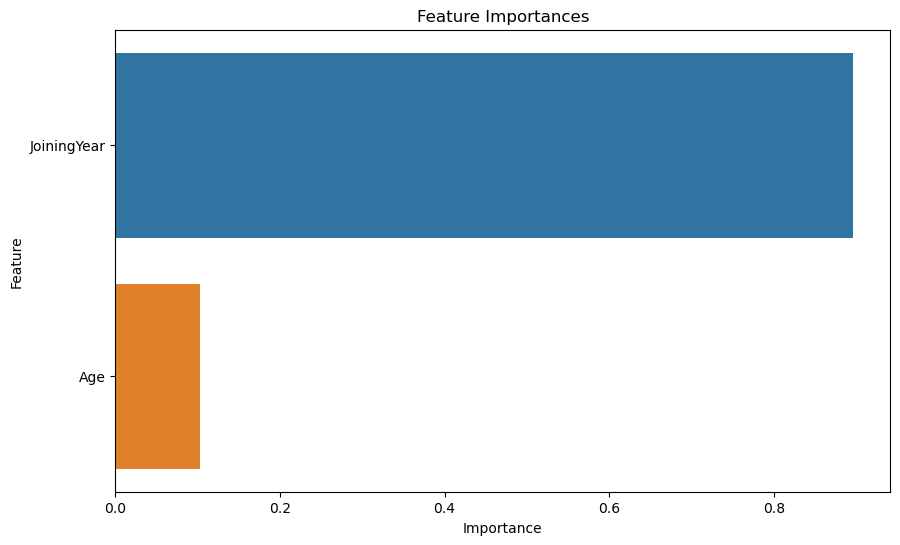

In [178]:
# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [179]:
# predicting the output for the test dataset
predictions = rfc_model.predict(X_test_new)

In [180]:
accuracy_score(y_test,predictions)

0.7314715359828142

In [181]:
report = classification_report(y_test, predictions)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       611
           1       0.99      0.22      0.36       320

    accuracy                           0.73       931
   macro avg       0.85      0.61      0.60       931
weighted avg       0.80      0.73      0.67       931



In [182]:
confusion_matrix(y_test,predictions)

array([[610,   1],
       [249,  71]], dtype=int64)

In [183]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score

# Calculate the metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)


In [184]:
# Create a dictionary to store the metrics
metrics = {
    'Precision': precision,
    'Recall': recall,
    'AUC': auc,
    'F1 Score': f1,
    'Accuracy': accuracy
}

# Print the metrics
for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')


Precision: 0.99
Recall: 0.22
AUC: 0.61
F1 Score: 0.36
Accuracy: 0.73
